# STAT 201 Group 3 Project Proposal

# Public Art in Vancouver

## Introduction

Vancouver is home to diverse cultural displays. Despite the potential benefits that community arts initiatives may bring, public art and artists as a group of people are thought to be associated with the gentrification of neighborhoods like the Downtown Eastside [(Szőke, T., &amp; Parizeau, K., 2018)](https://www.tandfonline.com/action/doSearch?AllField=%22public+art%22+and+%22community+development%22&SeriesKey=rgeo20) . Since the city of Vancouver is notorious for being the site of gentrification across many of its neighborhoods, it could be beneficial to understand the changing development of Vancouver’s communities through the lens of public art and how it develops over time. As such, for this project, our operational definition for gentrification will be the incidence of public art projects in the city of Vancouver to ultimately see if the development of public art, and thus community development, occurred simultaneously, or occurred in different neighborhoods at different times.

In this project, we will try to answer the following question: 

> Is the (mean) installation year of the public art in Downtown similar to Mount Pleasant?

The dataset we plan to work on is named 'Public Art' and is sourced from the City of Vancouver's [Open Data Portal](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj69K7_zZr7AhWzAjQIHdxLDqYQFnoECBoQAw&url=https%3A%2F%2Fwww.destinationvancouver.com%2Factivities%2Fsightseeing%2Fpublic-art-mini-guide%2F&usg=AOvVaw1C7YOKtvv8kVHkkdl_XYie). The dataset contains information on the location, artist, and installation date of public art in Vancouver, ranging from the early 1900s to 2022. Since the data has been updated routinely over the years, we assume that the dataset contains most of the population of interest. So for the purpose of hypothesis testing as if we only had access to a select part of the population, we'll simulate sampling by taking a sample of `n = 40` (20 from each category) of the population and conduct our analysis using that. Our population parameter is the mean because we believe it to be a suitable measure of determining when public art generally started to develop in each neighborhood. In the future, we may explore hypothesis testing with the medians.

## Preliminary Results

In [56]:
library(infer)
library(tidymodels)
library(gridExtra)

### Reading the file from the web

In [49]:
# Code to download file from: https://datasciencebook.ca/reading.html
url <- "https://opendata.vancouver.ca/explore/dataset/public-art/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B"
art_data <- read_csv2(url)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 659 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (16): ArtistProjectStatement, Type, Status, SiteName, SiteAddress, Prima...
dbl  (2): RegistryID, YearOfInstallation

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [50]:
head(art_data)

RegistryID,ArtistProjectStatement,Type,Status,SiteName,SiteAddress,PrimaryMaterial,URL,PhotoURL,Ownership,Neighbourhood,LocationOnsite,Geom,Geo Local Area,DescriptionOfwork,Artists,PhotoCredits,YearOfInstallation
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,"Commissioned by Duncan McNab and Associates, architects, and the engineering firm working on the Aquatic Centre.",Sculpture,In place,Vancouver Aquatic Centre,1050 Beach Avenue,Silicon bronze,https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=2,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/922bdce5fdfe90a5e586feebda0551b1,City of Vancouver,West End,Front entrance facing north,"{""coordinates"": [-123.135029, 49.27699], ""type"": ""Point""}",West End,"An abstract form representing the motion of swimming, this bronze sculpture is mounted on two poles in front of the Aquatic Centre.",264,Barbara Cole,1977
3,"Erected under the auspices of the Centennial Committee of Vancouver in cooperation with the Parks Board, the sculpture was presented to the City by Cunningham Drug Stores Ltd. whose first store was opened at Denman and Nelson Streets in 1911. The inscription reads, "" I mark my hours by shadow, mayest thou mark thine by sunshine."" The sundial commemorates three English ""greenhorns"" - Samual Brighouse, John Morton, and William Hailstone who in 1862 filed the first land claim and planned the first home and industry in the then heavily wooded area now bounded by Burrard Inlet, Stanley Park, English Bay and Burrard Street to which they received title in 1867.",Sculpture,In place,NA,NA,"bronze, stone, granite",https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=3,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/64cd73d9faab380800c3ef951960c896,City of Vancouver,West End,In centre of public seating area,NA,NA,"A classic bronze sundial sits on top of a 4'5"" high rectangular granite pedestal engraved with abstract modernist geometric designs. A second edition of the sundial was commissioned for the VanDusen Gardens around 1972.",41,NA,1967
4,NA,Fountain or water feature,No longer in place,Beach Towers Apartments,1600 Beach Avenue,"Steel & copper, mosaic tile",https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=4,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/cf9396569998a4e661d0570cbaf23a4b,private,West End,On west and east sides of the east tower,"{""coordinates"": [-123.142216, 49.28408], ""type"": ""Point""}",West End,Two copper ship-like abstract forms grace a pool of green water at this apartment dwelling.,145,NA,1965
12,"Rainforest was designed in response to a call for public outdoor sculptures to be constructed and exhibited at Expo ‘86 in Vancouver. The piece was fabricated in Vanier Park during the summer of 1986 where visitors were invited to watch the construction process and interact with the artist. The piece primarily consists of numerous parallel steel pipes intended to provide the sense of driving rain. Attached to many of these angled rain-like elements are shorter smaller pipes producing a simplified tree forms. Interspersed among the pipe components are various objects associated with forestry; a crosscut saw, a baseball bat, a ladder, a house, all set at the identical angle to the tree branches. The intention is to merge the visual sense of driving rain with trees and objects associated with forestry. Excessive repetition causes the piece to appear both chaotic and ordered. Hopefully viewers can focus on any one of, or all of these elements simultaneously.",Sculpture,No longer in place,On loan to The Reach Gallery in Abbotsford,NA,Steel,https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=12,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/9d8ad24e5bdbfaa685cc209b52b1c31d,City of Vancouver,NA,NA,NA,NA,"Rainfore

### Cleaning and wrangling the dataset

The raw dataset contains data we don't need, so we'll `select` and `filter`.

In [51]:
art_data <- art_data %>%
    select(Neighbourhood, YearOfInstallation) %>%
    filter(!is.na(Neighbourhood) & !is.na(YearOfInstallation))

head(art_data)

Neighbourhood,YearOfInstallation
<chr>,<dbl>
West End,1977
West End,1967
West End,1965
Mount Pleasant,1948
Grandview-Woodland,1959
Downtown,1966


Let's draw a random sample of `n = 40` from the population.

In [52]:
### Code from Worksheet 6, 3.4

set.seed(11)

art_sample <- 
    art_data %>% 
    filter(Neighbourhood == "Downtown") %>% 
    sample_n(size = 20) %>% 
    bind_rows(
        art_data %>% 
            filter(Neighbourhood == "Mount Pleasant") %>% 
            sample_n(size = 20))

head(art_sample)

Neighbourhood,YearOfInstallation
<chr>,<dbl>
Downtown,2006
Downtown,2016
Downtown,1997
Downtown,2000
Downtown,2016
Downtown,2011


### Data exploration

Here we compute summary statistics of the parameter (`Year of Installation`) we identified across our groups (`Neighbourhood`'s `Downtown` & `Mount Pleasant`). Although the primary focus of our inferential analysis will surround the mean, </mark>the other summary stats</mark> help us get a sense of the data's characteristics. Our data visualization includes the mean's point estimates too.

In [53]:
art_sample_stats <- art_sample %>%
    group_by(Neighbourhood) %>%
    summarise(mean = mean(YearOfInstallation), median = median(YearOfInstallation), sd = sd(YearOfInstallation))

### Extracting the point estimates of the mean for future use. Code from:
#   https://stackoverflow.com/questions/7448881/how-to-access-single-elements-in-a-table-in-r
downtown_mean <- as.numeric(art_sample_stats[1, "mean"])
pleasant_mean <- as.numeric(art_sample_stats[2, "mean"])
obs_mean_year_diff <- downtown_mean - pleasant_mean

art_sample_stats

Neighbourhood,mean,median,sd
<chr>,<dbl>,<dbl>,<dbl>
Downtown,2008.05,2011.5,14.55109
Mount Pleasant,2009.20,2016.0,14.22969


### Data visualization

Now we'll plot the sample distribution in histograms and a boxplot for both categories.

As can be seen from the histograms, both groups' distributions are not normal but rather left-skewed, with most installations occurring in the 2010s, and both are unimodal, with peaks again in the 2010s. In the boxplots, Mount Pleasant's median year is greater than Downtown's, and Downtown's inter-quartile range (the middle 50% of years) (1999 to 2016) is wider than Mount Pleasant's (2010 to 2016), meaning that the Downtown sample has a greater spread. The boxplots also display a non-normal distribution due to the uneven quartiles. (This is where the CLT comes into play.)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



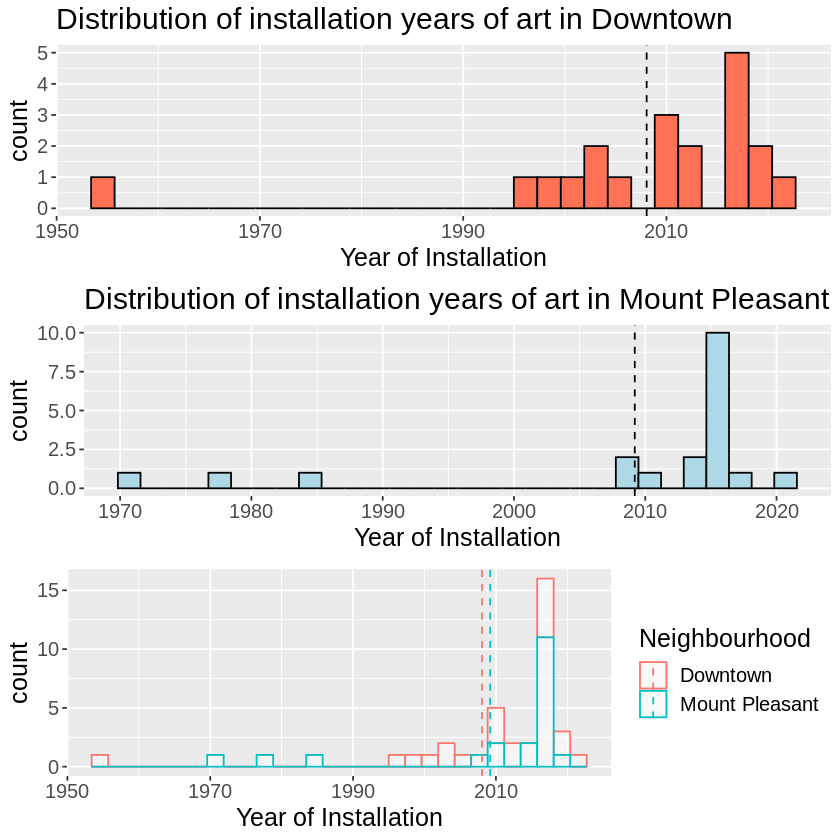

In [54]:
### Code to arrange the plots: Worksheet 8, 3.1
### Code for overlaid histograms:
#   http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization

plots <- list()

# Downtown
plots[[1]] <- art_sample %>%
    filter(Neighbourhood == "Downtown") %>%
    ggplot() +
    geom_histogram(aes(x = YearOfInstallation), color = "black", fill = "coral1") +
    ggtitle("Distribution of installation years of art in Downtown") +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15)) +
    geom_vline(aes(xintercept = downtown_mean), linetype = "dashed")

# Mount Pleasant
plots[[2]] <- art_sample %>%
    filter(Neighbourhood == "Mount Pleasant") %>%
    ggplot() +
    geom_histogram(aes(x = YearOfInstallation), color = "black", fill = "lightblue") +
    ggtitle("Distribution of installation years of art in Mount Pleasant") +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15)) +
    geom_vline(aes(xintercept = pleasant_mean), linetype = "dashed")

# Overlaid histograms
plots[[3]] <- art_sample %>%
    ggplot(aes(x = YearOfInstallation, color = Neighbourhood)) +
    geom_histogram(fill="white", alpha = 0.5) +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15)) +
    geom_vline(data = art_sample_stats, aes(xintercept = mean, color = Neighbourhood),
             linetype = "dashed")

grid.arrange(grobs = plots, ncol = 1)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


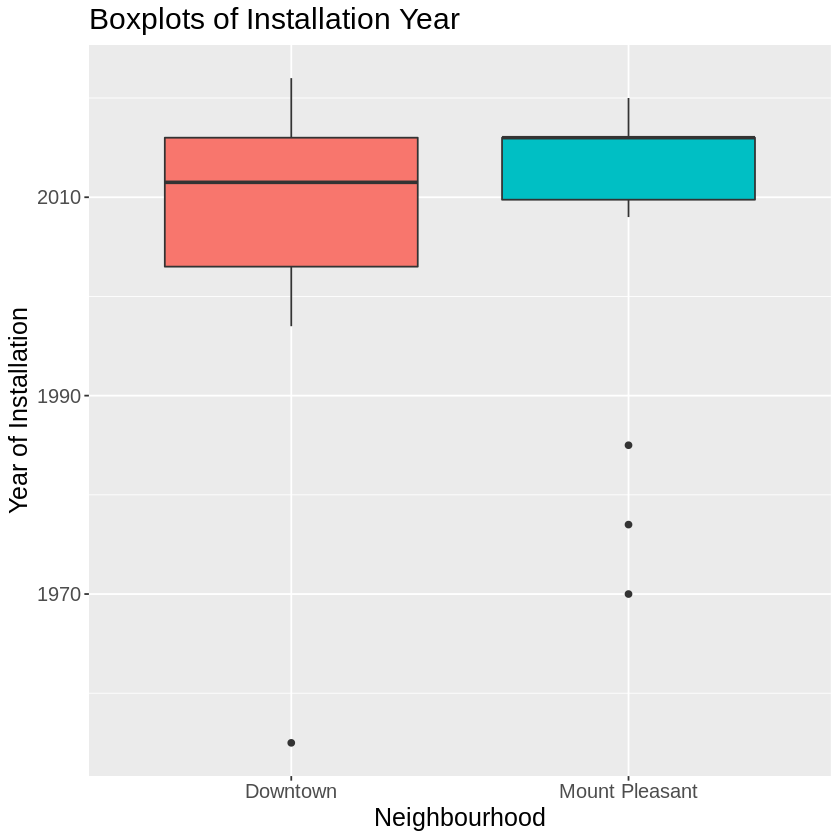

In [55]:
inst_year_boxplots <-
    art_sample %>% 
    ggplot() +
    geom_boxplot(aes(Neighbourhood, YearOfInstallation, fill = Neighbourhood)) +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplots of Installation Year") + 
    xlab("Neighbourhood") + 
    ylab("Year of Installation") + 
    guides(fill = FALSE)

inst_year_boxplots

## Methods

This report is trustworthy because the dataset is, to the best of our knowledge, accurate and collected independently, and the preliminary data exploration and visualizations are clear, straightforward, and easily interpretable.

However, the plot(s) and estimates that we produced are insufficient to give to a stakeholder, so our next steps will be to test a null hypothesis and construct a confidence interval using both bootstrapping and asymptotics methods (specifically, the Central Limit Theorem).

**Let $m_1$ be the mean installation year in Downtown and $m_2$ be the mean installation year in Mount Pleasant. Our hypotheses are $H_0: m_1-m_2 = 0$ vs $H_1: m_1-m_2 \neq 0$. We set our significance level to 0.10 because we think the stakes aren't high enough that false evidence would have consequences.** 

Hypothesis testing via `infer`:

1. Specify the variable of interest (`specify()`);
2. Define our hypotheses (`hypothesise()`);
3. Simulate the observations (`generate()`) - what the world would look like if there was no difference between the two neighbourhoods;
4. Generate values from the null model (`calculate()`);
5. See how the observed statistic compares with the sampling distribution by checking the p-value.

90, 95% confidence intervals via bootstrapping:

1. Take a sample (already done).
2. Construct the bootstrap sampling distribution.
3. Get the quantiles from the estimated sampling distribution.

90, 95% confidence intervals via CLT:

CLT states that when sample means are based on larger and larger sample sizes, the sampling distribution of these sample means becomes more normal. This is useful for our (likely) non-normal population distribution. Check that the CLT conditions hold: (a) the data will be sampled **randomly** using `rep_sample_n()`; (b) our sample size is approximately 10% of the population size (~350, [according to Destination Vancouver](https://opendata.vancouver.ca/explore/dataset/public-art/information/?location=12,49.25257,-123.13133)), so we're right on the edge of violating **independence**, but we think it should be fine, and (c) our choice of `n = 40` falls in the **recommended sample size range of 30 - 50** to get a reasonable approximation.

1. Take multiple samples (1000) of size 40 from the (filtered) population, without replacement.
2. Attain the sampling distribution of the sample mean.
3. Use `qnorm` to determine `lower_ci` and `upper_ci`, using the CLT's formula for *difference in means*.

In the end, we'll compare and comment on the CI results attained from bootstrapping and the theory-based CLT.

**What do you expect to find?** Based on preliminary results, we expect to fail to reject the null hypothesis at the 10% significance level because there appears to be no large difference between the mean installations years of public art in the two Vancouver regions.

**What impact could such findings have?** The confidence intervals for each group would show the uncertainty we have around our estimates, and could provide a pretty basic measurement of the volume of artistic work being put out over the years, which might be indicative of the speed of urbanization and how it affects different parts of a major city.

**What future questions could this lead to?**  We might examine the volume of public art in Vancouver according to a different categorical variable, such as the artist's cultural background (e.g. Indigenous). We could study art in other big cities, or examine whether the location or volume of public art correlates with the city's level of development.

## References

Arts, Culture, and Community Services - Cultural Services. “Public Art.” (2022). Retrieved November 6, 2022, from https://opendata.vancouver.ca/explore/dataset/public-art/information/?location=12,49.25257,-123.13133.

A mini-guide to Vancouver's public art. Vancouver. (n.d.). Retrieved November 6, 2022, from https://www.destinationvancouver.com/activities/sightseeing/public-art-mini-guide/ 

Szőke, T., &amp; Parizeau, K. (2018). Community-based public art and gentrification in the Downtown Eastside of Vancouver. GeoHumanities, 5(1), 157–177. https://doi.org/10.1080/2373566x.2018.1543554 
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj69K7_zZr7AhWzAjQIHdxLDqYQFnoECBoQAw&url=https%3A%2F%2Fwww.destinationvancouver.com%2Factivities%2Fsightseeing%2Fpublic-art-mini-guide%2F&usg=AOvVaw1C7YOKtvv8kVHkkdl_XYie